<a href="https://colab.research.google.com/github/sakamototaisei/python_pf_colabo/blob/main/PF_AI%E6%A0%AA%E4%BE%A1%E4%BA%88%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **探索的データ解析：EDA**

## **matplotlibを用いて株価の可視化**

In [1]:
from vega_datasets import data

stocks = data.stocks()

In [2]:
stocks

,symbol,date,price
0,MSFT,2000-01-01,39.81
1,MSFT,2000-02-01,36.35
2,MSFT,2000-03-01,43.22
3,MSFT,2000-04-01,28.37
4,MSFT,2000-05-01,25.45
...,...,...,...
555,AAPL,2009-11-01,199.91
556,AAPL,2009-12-01,210.73
557,AAPL,2010-01-01,192.06
558,AAPL,2010-02-01,204.62


In [12]:
symbols = stocks.symbol.unique()

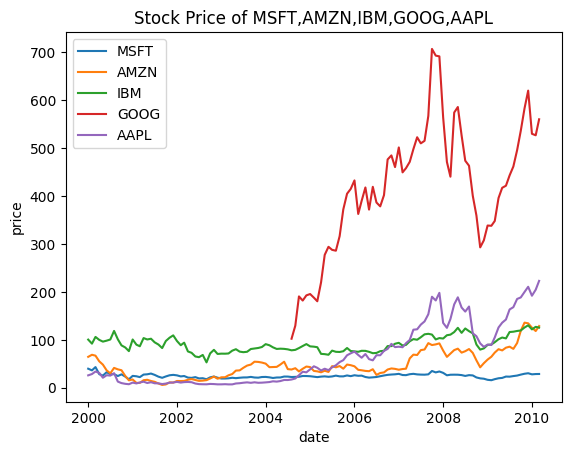

In [18]:
import matplotlib.pyplot as plt

for symbol in symbols:
    x = stocks[stocks['symbol'] == symbol]['date']
    y = stocks[stocks['symbol'] == symbol]['price']
    plt.plot(x, y)
    plt.xlabel('date')
    plt.ylabel('price')
plt.title(f'Stock Price of ' + ','.join(symbols))
plt.legend(symbols)
plt.show()

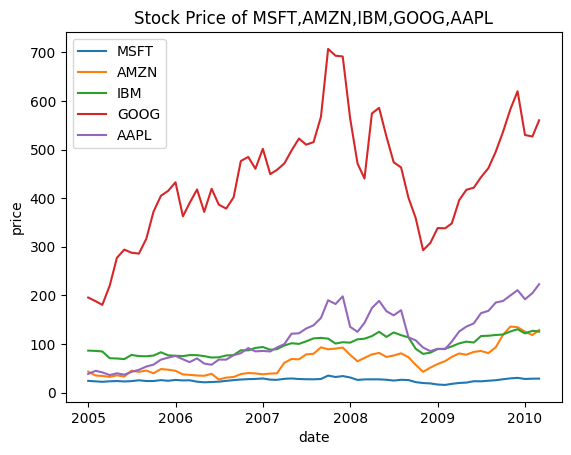

In [20]:
from vega_datasets import data
import matplotlib.pyplot as plt

# 表示期間の指定
start_date = '2005-01-01'
end_date = '2010-12-31'

# 株価データの取得
stocks = data.stocks()
stocks = stocks[(stocks['date'] >= start_date) & (stocks['date'] <= end_date)]

# 描画
symbols = stocks.symbol.unique()
for symbol in symbols:
    x = stocks[stocks['symbol'] == symbol]['date']
    y = stocks[stocks['symbol'] == symbol]['price']
    plt.plot(x, y)
plt.xlabel('date')
plt.ylabel('price')
plt.title(f'Stock Price of ' + ','.join(symbols))
plt.legend(symbols)
plt.show()

# **線形回帰**

## **訓練データについて知る**

**訓練データのイメージ**

train_x[1] = [t_1の時の2xの値, t_2の時の2xの値, ... t_6の時の2xの値]

...

train_x[N-6] = [t_N-6の時の2xの値, t_N-5の時の2xの値, ... t_N-1の時の2xの値]

train_t = [[t_7の時の2xの値], [t_8の時の2xの値], [...], ...]

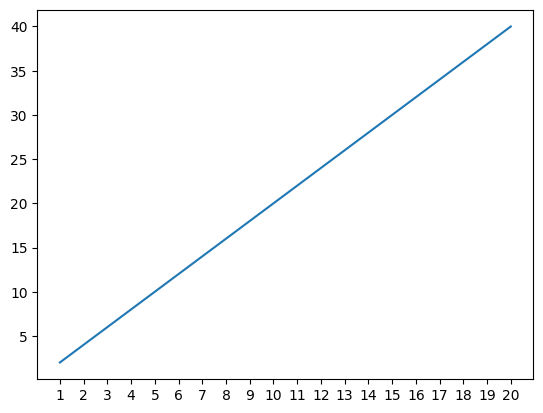

In [21]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1, 21, 1)
y = 2 * x
plt.plot(x, y)
plt.xticks(x)
plt.show()

In [22]:
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [37]:
N = len(x)
n = 6
train_x = []
train_t = []

for i in range(N):
    if i + n + 1 == N:
        break
    temp = []
    for j in range(n):
        temp.append(x[i+j])
    train_x.append(temp)
    train_t.append(x[i+j+1])

In [40]:
import torch

train_x = torch.Tensor(train_x)
train_t = torch.Tensor(train_t)

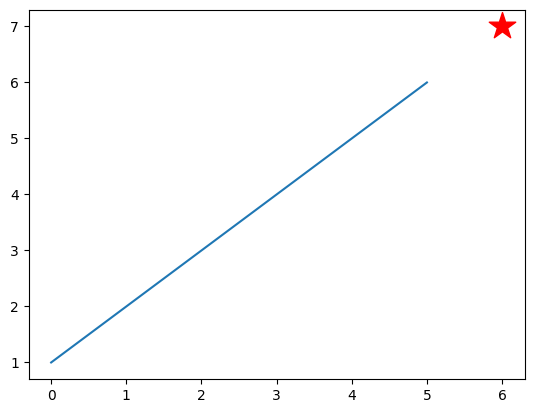

In [41]:
import matplotlib.pyplot as plt

plt.plot(train_x[0])
plt.scatter(6, train_t[0], marker='*', s=400, color='red')
plt.show()

## **正規化**